# Palmer Penguins
***

This notebook contains my analysis of the palmer penguins data set. The palmer penguins data set contains data measurements for three different penguin species, the Chinstrap, Gentoo and Adélie penguin. The data was collected between 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://lternet.edu/site/palmer-antarctica-lter/) on three different islands in the Palmer Archipelago, Antarctica. The Palmer archipelago is named after [Nathaniel Palmer](https://en.wikipedia.org/wiki/Nathaniel_Palmer), an American explorer who explored this part of the Antartica in 1820.

![The Palmer Penguins. Artwork by @allison_horst](https://sebastiancallh.github.io/ox-hugo/palmer-penguins.png)

The Palmer Penguins, artwork by @allison_horst






According to [AllisonHorst.github.io](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md) "the goal of the palmerpenguins is to provide a great dataset for data exploration and visualization, as an alternative to iris". 

# TO DO

map of the islands if possible



Tidy up data types - currently a hot mess

Think about how to tidy up different variables I've assigned. Must be a cleaner and clearer way to do it.


Correlation part needs comments. 

Add research on the data set. Who uses it and why? Recent research?  Building on the work in literature (lol) and comparison to similiar work.

## Import Modules
***

Four modules are required for this analysis:
* pandas - for manipulating data and for performing data analysis
* numpy - performs a wide variety of mathematical calculations on arrays
* matplotlib.pyplot - to create plots
* seaborn - to create plots

In [2]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib.pylab
import matplotlib.pylab as plt

# Import seaborn
import seaborn as sns

## Importing the data set
***

The data set was imported as a csv file from [Seaborn Data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The original raw data set is available on Alison Horst's [GitHub](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins_raw.csv).

The seaborn data set used has the advantage in that it has been processed to remove extraneous information such as any clutch size, date egg and some other additional information that is not required for this analysis.

In [3]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [4]:
# Have a look. Check that the file has loaded correctly.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Overview of the data set and the variables it contains.
***

In [5]:
# df.head() prints out the first five rows of the csv file.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
# Counts the number of rows and columms in the data set.
df.shape

(344, 7)

In [7]:
# df.info() gives concise information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
# A count of the number of missing variables.
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
# Unique names in the species column.
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
# Unique values in the island column.
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
# Unique names in the sex column.
df["sex"].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

**Overview of the data set and the variables within it.**

The data set has 344 rows and seven columns. Each row is an individual penguin and for each penguin there are seven possible variables.

The seven variables in the dataset are:
* species
* island
* bill_length in mm
* bill depth in mm
* flipper length in mm
* the body mass in g
* the sex of the penguin.

Three penguin species were studied - the Adelie, Chinstrap and Gentoo penguin and they were found on three islands in the Palmer Archipelago, Antarctica - Dream, Torgerson and Biscoe. The sex of the penguins was also observed. 

Bill length, bill depth and flipper length were all measured in mm. This artwork by Allison Horst nicely depicts the difference between the bill length and bill depth and how they were measured. Please note that in the original data set the word culmen was used in place of bill. The body mass of the penguins were measured in grams.


![Bill length and bill depth](https://miro.medium.com/v2/resize:fit:640/format:webp/1*WSb-Y9xb3YSx9owW7_JuMw.png)

_Penguin Bills, artwork by @allison_horst_

There are no variables missing from two columns, the species and island columns. The other columns have some missing data. The sex column has the most numbers of missing variables with 11. Bill length, bill depth, flipper length and body mass all have two pieces of missing data each.

## Data types in the data set.

When a data set is loaded pandas automatically assigns what it thinks is the best data type for the data. Numerical data are categorised as integers or floats. Non-numerical data are automatically assigned as objects or strings. 

Pandas data type names have a slightly different name compared to their python data types name, as shown in the table below.

| Python | Pandas |
|--------|--------|
| string| object|
|float|float64|
|integer|int64|
|bool|bool|
| - |category|
|-|datetime64|

In [12]:
# Check the data type of the variables.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

__Data types__

The bill length, bill depth, flipper length and body mass were given the data type float64 by pandas. Species, island and sex are all non-numerical data and were assigned the object data type.

Bill length and bill depth were measured in mm with the result recorded to one decimal place. These are floating point numbers and pandas has correctly assigned them to the data type of float64.

After reviewing the raw data file I noticed that while flipper length and body mass were measured in mm, they were not measured to the same degree of accuracy as the bill measurements and were recorded as whole numbers i.e. integers. The correct data type for these two columns should be int64.

After completing the data camp course, [working with categorical data](https://app.datacamp.com/learn/courses/working-with-categorical-data-in-python) I realised if a column contains a limited and fixed number of possible non-numerical values it should, if possible be assigned to the pandas data type of [category](https://pandas.pydata.org/docs/user_guide/categorical.html). There is no corresponding data type in python. For large data sets changing the data type to category could potentially result in significant memory savings.

I had originally assumed that the object data type applied to species, island and sex was correct however these three columns could be assigned to the data type of category as they all have limited fixed values so I will change their data type to category.

In [13]:
# Change the data type to category for species, island and sex columns.
df[['species', 'island', 'sex']] = df[['species', 'island', 'sex']].astype('category')

For consistancy I would like the formatting of the sex column to be in line with the formatting of the species and island columns i.e title case.

In [14]:
# Changing the format of the sex column.
df['sex'] = df['sex'].str.title()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


__Dealing with missing data__

When I attempted to change the data type of the flipper length and body mass columns using the [astype method](https://www.geeksforgeeks.org/python-pandas-dataframe-astype/), pandas was not happy with the missing values in both of these columns so I need to clean the data set.

Missing data could be dealt with by:
* dropping the rows with missing data with the [dropna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
* replacing the missing data using the [fillna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

First I need to look at the rows with missing data to decide which option to take.

In [15]:
# Find the rows with missing data
df[df.isnull().any(axis = 1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [16]:
# Rows with missing values in the flipper length and body mass columns.
df.iloc[[3, 339]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


I decided to drop rows 3 and 339 as dropping two rows from the data frame won't have a large effect on the overall results. I do appreciate that I will lose information regarding 2 penguins. 
Keep all the missing sex data. I would like to see if I could guess the sex of the penguin from the data. Probably beyond me for now. 

In [17]:
# Drop rows with at least 3 non missing values.
df.dropna(thresh = 3, inplace = True)

In [18]:
# Check to see if the rows with missing values in the flipper lenght and body mass columns have been dropped.
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [19]:
# Change the flipper length and body mass columns to the int data type.
df[['flipper_length_mm', 'body_mass_g']] = df[['flipper_length_mm', 'body_mass_g']].astype('int64')

In [20]:
# Check to see if the data type changes have been applied. 
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm       int64
body_mass_g             int64
sex                    object
dtype: object

Please note that the data type of the sex column remained unchanged due to the missing data. It would be possible to remove the missing data but as there are nine rows of useful infomation with respect to the other variables, it will be left unchanged. It would be interesting to analyse those nine rows to see if they could be used to infer the probably sex of the penguins. This is beyond the scope of this project and realistically my current ability level!

In [21]:
# Check the cleaned dataframe.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
4,Adelie,Torgersen,36.7,19.3,193,3450,Female
5,Adelie,Torgersen,39.3,20.6,190,3650,Male


__Summary Statistics for the Palmer penguins data set__

In [22]:
# Describe the data set. Summary statistics about the data file. 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [23]:
# Renaming and reorganising the dataset so that the species column is now the index column. This will make slicing using loc() easier.
penguins = df.set_index("species")
penguins.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181,3750,Male
Adelie,Torgersen,39.5,17.4,186,3800,Female
Adelie,Torgersen,40.3,18.0,195,3250,Female
Adelie,Torgersen,36.7,19.3,193,3450,Female
Adelie,Torgersen,39.3,20.6,190,3650,Male


In [24]:
# Create an Adelie penguin dataframe and summary statistics for the Adelie penguins
adelie = penguins.loc[['Adelie']]
adelie.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [25]:
# Create an Chinstrap penguin dataframe and summary statistics for the Chinstrap penguins.
chinstrap = penguins.loc[['Chinstrap']]
chinstrap.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [26]:
# Create an Gentoo penguin dataframe and summary statistics for the Gentoo penguins.
gentoo = penguins.loc[['Gentoo']]
gentoo.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


## Bar chart of the penguin population on each island.
***

Task: Create a bar chart of an appropriate variable.

A bar chart could be used to examine the penguin population on each island.

In [27]:
# Penguin population on each island.
df['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

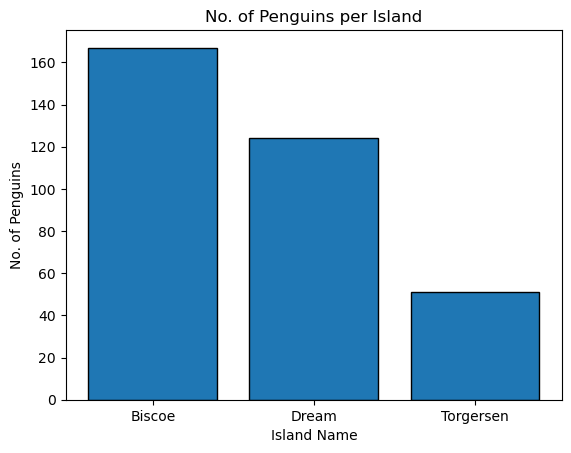

In [28]:
# Plotting a bar chart of the penguin population on each island

# Setting the x-axis to the islands
xpoints = np.array(["Biscoe", "Dream", "Torgersen"])

# Setting the y-axis to the count of each penguin per island
ypoints = np.array(df['island'].value_counts())

plt.bar(xpoints, ypoints, edgecolor = "black")

plt.xlabel("Island Name")
plt.ylabel("No. of Penguins")
plt.title("No. of Penguins per Island")
plt.show()

__Investigating the penguin species that are present on each island.__

While the above bar chart is reasonable, it would be nice to get more information about the penguins and to discover what penguin species live on each island. A bar chart could then be plotted to show a breakdown of the penguin count by species on each island. 

To do this we need to know:
* the penguin species that are present on each island
* a count of the penguins by species for each island.

In [29]:
# A count of the different penguin species on each island.  
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       123
           Adelie        44
           Chinstrap      0
Dream      Chinstrap     68
           Adelie        56
           Gentoo         0
Torgersen  Adelie        51
           Chinstrap      0
           Gentoo         0
Name: count, dtype: int64

The results of the count of the different species on each island can be visualised using a bar chart. After much trial and error, a [Countplot in Seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html) appears to be the simplest method of plotting the required bar chart. Seaborn has two functions to generate bar plots, countplot and barplot. A countplot is used for categorical data (like species) while a barplot is used for numeric data.  

 https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/?ref=ml_lbp

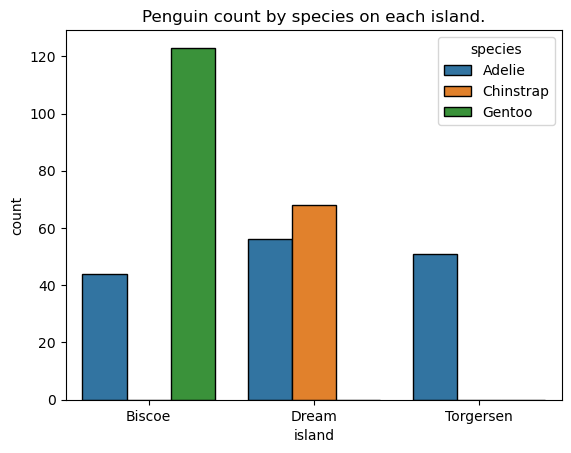

In [30]:
# A breakdown of the penguin population on each island by species.
sns.countplot(df, x = 'island',
            hue = 'species',
            edgecolor = 'black'
            )
plt.title('Penguin count by species on each island.')
plt.show()

__Summary of the penguin population on each island.__

Biscoe is the most populous island with 167 penguins. Torgersen is the least populous island with only 51 penguins of the penguins studied. 

Both Biscoe and Dream have two penguin species present, with only one penguin species present on Torgersen. Adelie penguins were found on all three islands, with Chinstrap and Gentoo found on Dream and Torgersen respectively.

## Histogram of an appropriate variable
***

Task: Make a histogram of an appropriate variable. 

Chosen variable is flipper length.

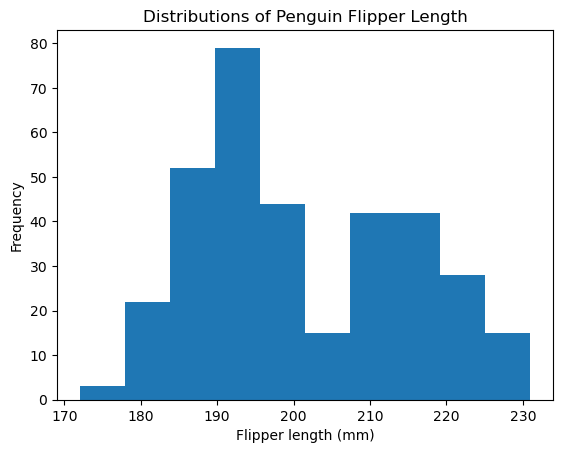

In [31]:
# Plot of the distribution of flipper length (mm)
plt.hist(np.array(df["flipper_length_mm"]))
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.title("Distributions of Penguin Flipper Length")
plt.show()

The histogram would be expected to have a normal curve distribution but as we can see it doesn't and has a very unusual shape. Further analysis is required to explain the shape of the histogram.

__Normal Distribution__ADD reference

![Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Standard_Normal_Distribution.png/320px-Standard_Normal_Distribution.png)





As there are three penguin species, I will now analyse the flipper length for each species to see if that explains the unusual shape of the histogram.

In [32]:
# Investigating the mean, standard deviation and median of the flipper length for the different penguin species.
df.groupby("species")["flipper_length_mm"].agg([np.mean, np.std, np.median, min, max])

,mean,std,median,min,max
species,,,,,
Adelie,189.953642,6.539457,190.0,172,210
Chinstrap,195.823529,7.131894,196.0,178,212
Gentoo,217.186992,6.484976,216.0,203,231


In [33]:
# Same as above but using pivot_table # Investigating the mean, standard deviation and median of the penguin species
df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,flipper_length_mm,flipper_length_mm,flipper_length_mm
species,,,
Adelie,189.953642,6.539457,190
Chinstrap,195.823529,7.131894,196
Gentoo,217.186992,6.484976,216


The above table demonstrates that each of the penguin species have noticeably different flipper lengths. The Gentoo penguins have the largest flippers with the average flipper length of 217mm and a median value of 216mm. The Adelie penguins have the smallest flipper length of 189mm with a median of 190mm.

The bars on the right of the above histogram from approximately 208mm is the distribution of flipper lengths for the Gentoo penguin. The bars on the left are for the overlapping values of the Adelie and Chinstrap penguins.

An improved histogram is required to show the distribution of flipper lengths for the penguin species. 

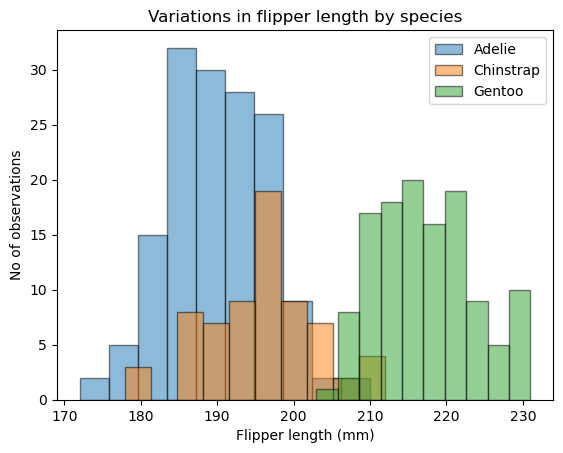

In [34]:
# Histogram of the variations in flipper length by species.
# This is my histogram for the task.

fig, ax = plt.subplots()
ax.hist(adelie['flipper_length_mm'], label = "Adelie", edgecolor = "black", alpha = 0.5)
ax.hist(chinstrap['flipper_length_mm'], label = "Chinstrap", edgecolor = "black", alpha = 0.5)
ax.hist(gentoo['flipper_length_mm'], label = "Gentoo", edgecolor = "black", alpha = 0.5)
ax.set_title("Variations in flipper length by species")
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("No of observations")
ax.legend()
plt.show()

This histogram clearly demonstrates that each species has a distinct flipper size. A larger data set would give a plot be similiar to a standard distribution curve..REPHRASE 

It would be possible from flipper length to identify a penguin as a Gentoo penguin. It would be more difficult to classify the Adelie and the Chinstrap penguins by their flipper lengths alone as the values overlap.

## Project
***

Select two variables for the data set and provide an analysis of how correlated they are.

My chosen variables to compare are flipper length and body mass. 

### Scatter plot

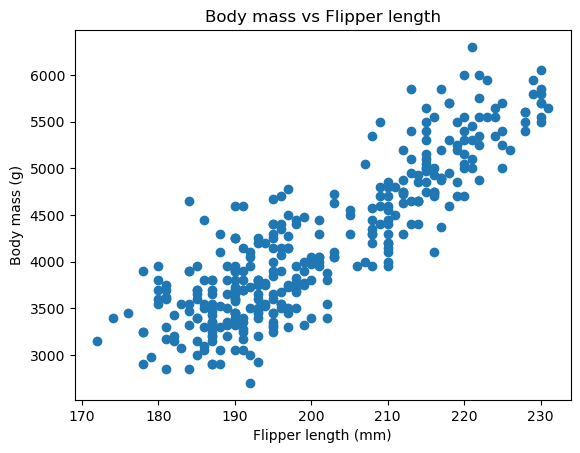

In [35]:
# Simple scatter plot to get started of body mass (g) vs flipper length (mm)
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.title('Body mass vs Flipper length')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')
plt.show()

__Scatter plot by species__

The COMMENT ON PLOT

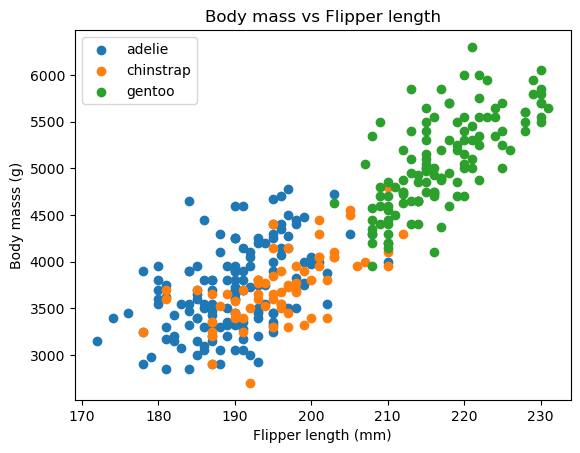

In [63]:
# Scatter plot of body mass (g) vs flipper length (mm) by species.
fig, ax = plt.subplots()

ax.scatter(adelie['flipper_length_mm'], adelie['body_mass_g'], label = 'adelie')
ax.scatter(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'], label = 'chinstrap')
ax.scatter(gentoo['flipper_length_mm'], gentoo['body_mass_g'], label = 'gentoo')
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Body masss (g)')
ax.set_title('Body mass vs Flipper length')
ax.legend()
plt.show()

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


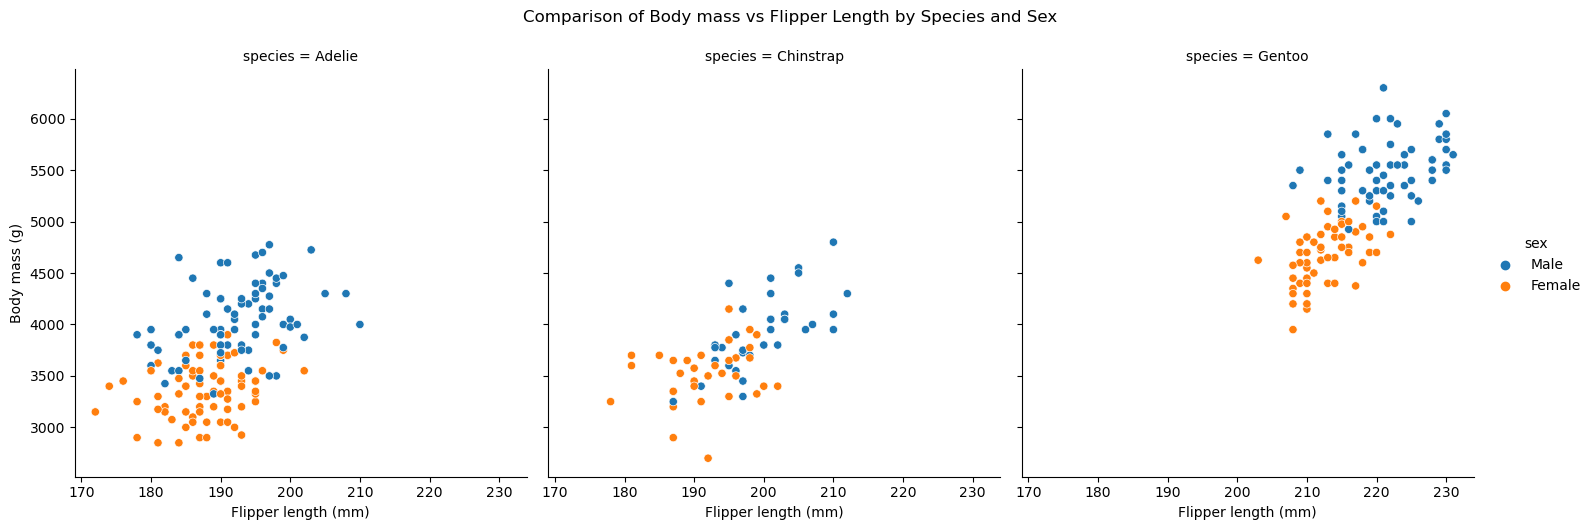

In [66]:
#import warnings
#warnings.filterwarnings('ignore')

g = sns.relplot(x = 'flipper_length_mm', y = 'body_mass_g', col = 'species', hue = 'sex', data = penguins)
g.fig.suptitle('Comparison of Body mass vs Flipper Length by Species and Sex', y = 1.05)
g.set(xlabel = 'Flipper length (mm)', ylabel = 'Body mass (g)')
plt.show()

### Correlation between body mass and flipper length.
***

The results from a correlation are in the range of -1 to +1, with -1 indicating a strong negative correlation, 0 indicating no correlation and +1 is a strong positive correlation https://www.ncbi.[Common pitfalls in statistical analysis: The use of correlation techniques](nlm.nih.gov/pmc/articles/PMC5079093/).

correlation ()

In [38]:
# Overall correlation between flipper length and body mass.
penguins['body_mass_g'].corr(penguins['flipper_length_mm'])

0.871201767306011

Calculating the correlation between body mass and flipper length by species

In [39]:
# Correlation between flipper length and body mass for Adelie penguins.
adelie['body_mass_g'].corr(adelie['flipper_length_mm'])

0.4682016942179394

In [40]:
# Correlation between flipper length and body mass for Chinstrap penguins.
chinstrap['body_mass_g'].corr(chinstrap['flipper_length_mm'])

0.6415594129316967

In [41]:
# Correlation between flipper length and body mass for Gentoo penguins.
gentoo['body_mass_g'].corr(gentoo['flipper_length_mm'])

0.7026665243575183

__Correlation between flipper length and body mass__

When the overall correlation is calculated it appears that there is a strong poditive correlation between flipper length and body mass with a value of 0.87. However when the correlation is performed by penguin species that the true correlation is lower. Adelie penguins display a moderate correlation with a value of 0.47 and the Gentoo penguins have a 

element wise correlation https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/

In [42]:
# Calculating the correlation between all the variables in the Adelie penguin. 
adelie_corr = adelie.drop(['island', 'sex'], axis = 1).corr()
adelie_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.391492,0.325785,0.548866
bill_depth_mm,0.391492,1.000000,0.307620,0.576138
flipper_length_mm,0.325785,0.307620,1.000000,0.468202
body_mass_g,0.548866,0.576138,0.468202,1.000000


Overall for the Adelie penguin there is a weak to moderate correlation between the different variables. The strongest correlation in the table is between bill depth and body mass at 0.58, with bill length and body mass closely behind it at 0.55. 

While we can read the above table, it is not very visual and it has to be carefully analysed. [Seaborn heatmaps](https://www.datacamp.com/tutorial/seaborn-heatmaps) are very useful tool to visualise numerical data. The data is organised in a grid by colour, with the colour indicating order of magnitude. It is much easier to identify relationships between the variables of interest. 

As heatmaps require numerical data, I dropped the columns for island and sex for all species data sets. To make comparsions between the species easier to identify, I adjusted the scale of the heatmap so that the same colour corresponded to the same order of magnitude. 

Compare male vs female within the chosen variables

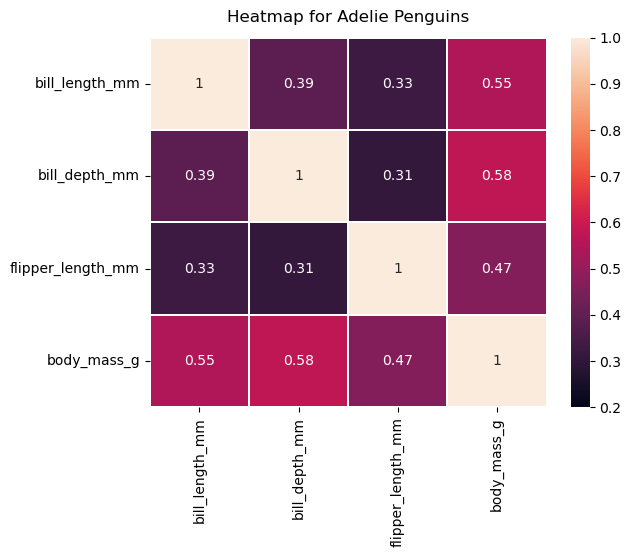

In [43]:
sns.heatmap(adelie.drop(['island', 'sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Adelie Penguins', y= 1.02)
plt.show()

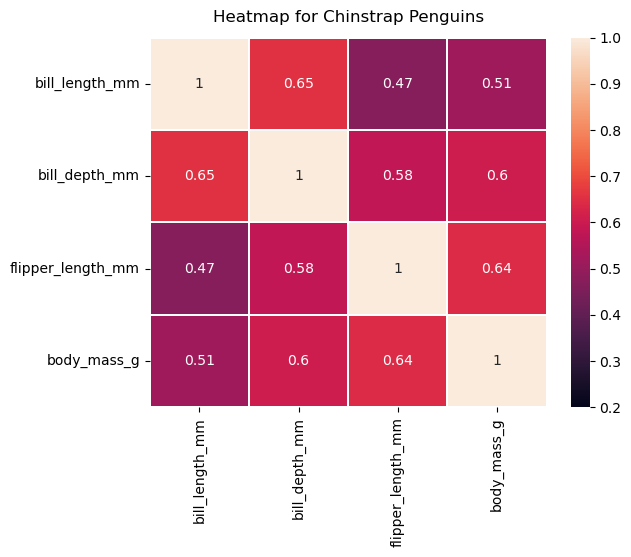

In [44]:
sns.heatmap(chinstrap.drop(['island','sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Chinstrap Penguins', y= 1.02)
plt.show()

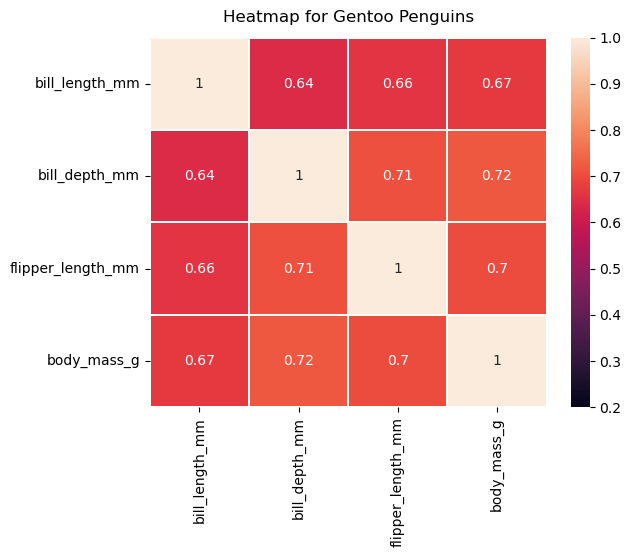

In [45]:
sns.heatmap(gentoo.drop(['island','sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Gentoo Penguins', y= 1.02)
plt.show()

While a straight comparison appears to be a good correlation but when it is check by species. Poor correlation between body mass and flipper length for adelie penguins. Gentoo has a moderat( check correct term) correlation. 

Study of male vs female within the three different species. How would i plot it?

scatter plot by species male vs female
plot for each of 4 variables. 

In [46]:
male_adelie = adelie[(adelie['sex'] ==  'Male')]
female_adelie = adelie[(adelie['sex'] ==  'Female')]

male_chinstrap = chinstrap[(chinstrap['sex']) == 'Male']
female_chinstrap = chinstrap[(chinstrap['sex']) == 'Female']

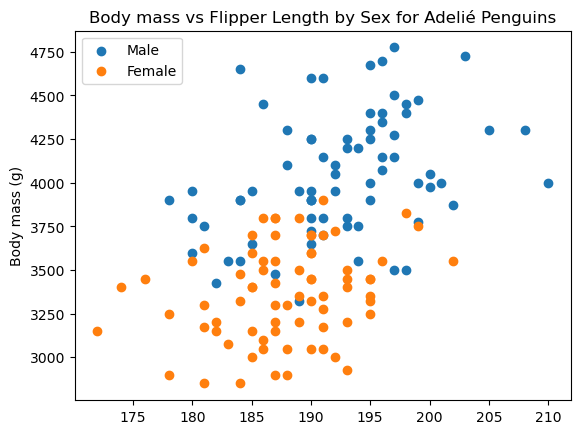

In [67]:
fig, ax = plt.subplots()

ax.scatter(male_adelie['flipper_length_mm'], male_adelie['body_mass_g'], label = 'Male') 
ax.scatter(female_adelie['flipper_length_mm'], female_adelie['body_mass_g'], label = 'Female')
ax.set_ylabel('Body mass (g)')
ax.set_title('Body Mass vs Flipper Length by Sex for Adelié Penguins')
ax.legend()
plt.show()


In [48]:
male_adelie['body_mass_g'].corr(male_adelie['flipper_length_mm'])

0.3604344747004836

In [49]:
female_adelie['body_mass_g'].corr(female_adelie['flipper_length_mm'])

0.26292964118829837

Any differences between the Adelie penguins on the three different islands?

* Adelie penguins live on all three islands, are there any differences in flipper, bills, body mass? 

In [50]:
adelie.isnull().sum()


island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  5
dtype: int64

In [51]:
adelie.duplicated().sum()

0

In [52]:
adelie['body_mass_g'].corr(adelie['flipper_length_mm'])

0.4682016942179394

In [53]:
adelie.groupby('island')['body_mass_g'].mean()

island
Biscoe       3709.659091
Dream        3688.392857
Torgersen    3706.372549
Name: body_mass_g, dtype: float64

In [54]:
adelie.groupby('island')['body_mass_g'].mean().std()

11.447877359102542

** Investigating the Penguin Species.

In [55]:
df.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,151,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,123,123,123,123,123,119


* Some information on the sex of the penguin is missing for some penguins. Could I predict whether they are male or female based on the other traits. 

Gentoo penguins, missing sex data. Can I tell if guess(?, need better word, if they are male or female.)

1st get the missing rows.


In [56]:
gentoo[gentoo.isnull().any(axis = 1)]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Gentoo,Biscoe,44.5,14.3,216,4100,NaN
Gentoo,Biscoe,46.2,14.4,214,4650,NaN
Gentoo,Biscoe,47.3,13.8,216,4725,NaN
Gentoo,Biscoe,44.5,15.7,217,4875,NaN


c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


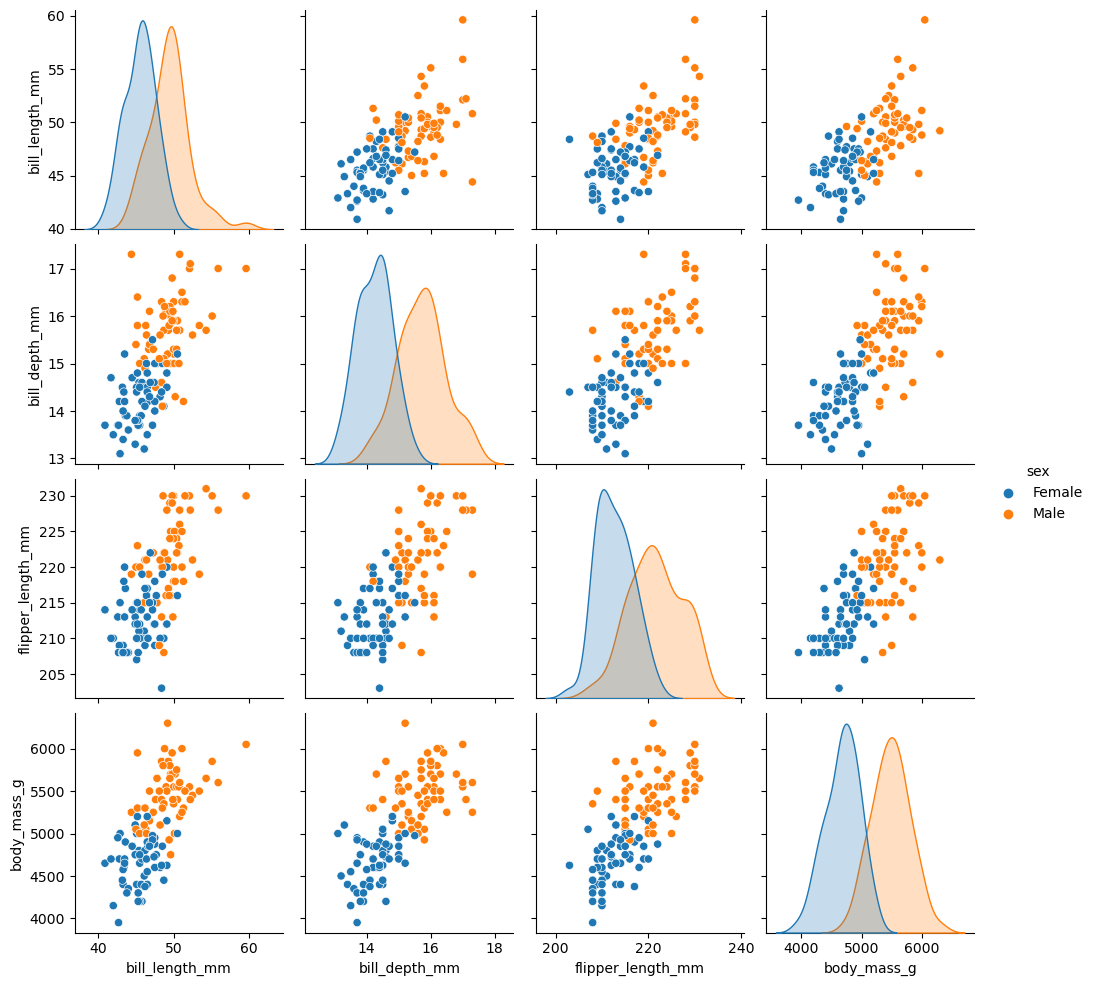

In [57]:
sns.pairplot(gentoo, hue = 'sex')

In [58]:
df.groupby('island')['body_mass_g'].mean()


island
Biscoe       4716.017964
Dream        3712.903226
Torgersen    3706.372549
Name: body_mass_g, dtype: float64

In [59]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [60]:
# Number and sex of penguins
df["sex"].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

## Brainstorm

WHat two variables could I compare?

* Do heavier penguins have longer flippers or bill length?
* Bigger bills, bigger body mass? Bigger bills can eat more? 
* 


In [61]:
df.groupby("species").agg({"flipper_length_mm": 'mean', 'bill_length_mm' : 'mean', 'bill_depth_mm' : 'mean', 'body_mass_g' : 'mean'})

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g
species,,,,
Adelie,189.953642,38.791391,18.346358,3700.662252
Chinstrap,195.823529,48.833824,18.420588,3733.088235
Gentoo,217.186992,47.504878,14.982114,5076.016260


In [62]:
# Are male penguins heavier than female penguins?

df.groupby('sex')['body_mass_g'].mean()

sex
Female    3862.272727
Male      4545.684524
Name: body_mass_g, dtype: float64

https://www.neuraldesigner.com/learning/examples/palmer-penguins/

### References

Datacamp [Introduction to Data Visualization with Matplotlib](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib)

Datacamp [Data Manipulation with Pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas)

Datacamp [Introduction to Data Visualization with Seaborn](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn)


## End

***